In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
path = '/content/Витрина данных1 — копия.xlsx'

In [ ]:
df = pd.read_excel(path, sheet_name="Лист1")

In [ ]:
df1 = df.drop(columns = ['Клиент'])

In [ ]:
df1

,Количество чеков,Количество товаров,Среднее количество товаров в чеке,Выручка,Количество выкуп чеков,Количество выкуп товаров,Среднее количество выкуп товаров в чеке,Выручка выкуп,Процент выкупа,Крупная бытовая техника,...,СкидкаНаТоварПоПромоСлову,Подарки,СкидкаНаКомплект,Unnamed: 31,Онлайн-Резерв.,Колл-центр,Сайт,Терминал,Большой город,Курьерская
0,12,17,1.416667,338320.4,9,14,1.555556,298580.4,0.823529,5,...,0,0,0,0,17,0,0,0,1,0
1,1,2,2.000000,27989.0,0,0,0.000000,0.0,0.000000,0,...,0,0,0,0,2,0,0,0,1,1
2,1,1,1.000000,23680.0,0,0,0.000000,0.0,0.000000,0,...,0,0,0,0,1,0,0,0,1,1
3,1,1,1.000000,2420.0,1,1,1.000000,2420.0,1.000000,0,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1.000000,8999.0,1,1,1.000000,8999.0,1.000000,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123107,1,1,1.000000,31480.0,0,0,0.000000,0.0,0.000000,0,...,0,0,0,0,1,0,0,0,0,0
123108,1,1,1.000000,18860.0,0,0,0.000000,0.0,0.000000,1,...,0,0,0,0,1,0,0,0,0,1
123109,1,1,1.000000,1149.0,1,1,1.000000,1149.0,1.000000,0,...,0,0,0,0,1,0,0,0,1,1
123110,1,1,1.000000,6859.0,0,0,0.000000,0.0,0.000000,1,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df1.isnull().values.any()

False

# Kmeans

In [ ]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 16)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k)
    kmeanModel = kmeans.fit(df1)
    kmeanModel.fit(df1)
    distortions.append(sum(np.min(cdist(df1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df1.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df1.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 24089.832624956238
2 : 21313.107809088626
3 : 19086.091512031686
4 : 17615.040720041245
5 : 15460.099632852995
6 : 13181.278407350917
7 : 12642.173964878419
8 : 11871.370977259197
9 : 11795.773385385293
10 : 11128.206601262864
11 : 10618.454098586606
12 : 9982.296975428997
13 : 9749.561510015426
14 : 9696.746616722803
15 : 8176.93750314915


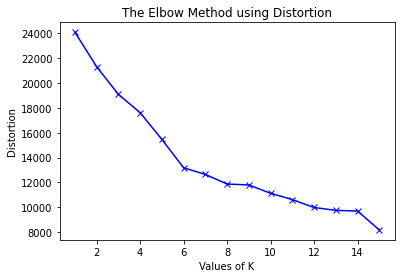

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

6 кластеров

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 16)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k)
    kmeanModel = kmeans.fit(df1)
    kmeanModel.fit(df1)
    score = silhouette_score(df1,  kmeans.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.970
Silhouetter Score: 0.931
Silhouetter Score: 0.898
Silhouetter Score: 0.841
Silhouetter Score: 0.738
Silhouetter Score: 0.703
Silhouetter Score: 0.699
Silhouetter Score: 0.662
Silhouetter Score: 0.672
Silhouetter Score: 0.650
Silhouetter Score: 0.616
Silhouetter Score: 0.615
Silhouetter Score: 0.620
Silhouetter Score: 0.617


13 кластеров

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 16)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k)
    kmeanModel = kmeans.fit(df1)
    kmeanModel.fit(df1)
    score = calinski_harabasz_score(df1,  kmeans.labels_)
    print('Calinski and Harabasz Score: %.3f' % score)

Calinski and Harabasz Score: 105540.530
Calinski and Harabasz Score: 104742.256
Calinski and Harabasz Score: 119491.098
Calinski and Harabasz Score: 124769.527
Calinski and Harabasz Score: 126709.969
Calinski and Harabasz Score: 123386.611
Calinski and Harabasz Score: 122300.788
Calinski and Harabasz Score: 125444.359
Calinski and Harabasz Score: 129691.471
Calinski and Harabasz Score: 135030.564
Calinski and Harabasz Score: 139286.824
Calinski and Harabasz Score: 144311.408
Calinski and Harabasz Score: 149330.618
Calinski and Harabasz Score: 153135.922


6 кластеров

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 16)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k)
    kmeanModel = kmeans.fit(df1)
    kmeanModel.fit(df1)
    score = davies_bouldin_score(df1,  kmeans.labels_)
    print('Davies-Bouldin Score: %.3f' % score)

Davies-Bouldin Score: 0.580
Davies-Bouldin Score: 0.691
Davies-Bouldin Score: 0.625
Davies-Bouldin Score: 0.711
Davies-Bouldin Score: 0.771
Davies-Bouldin Score: 0.766
Davies-Bouldin Score: 0.793
Davies-Bouldin Score: 0.752
Davies-Bouldin Score: 0.731
Davies-Bouldin Score: 0.757
Davies-Bouldin Score: 0.733
Davies-Bouldin Score: 0.698
Davies-Bouldin Score: 0.698
Davies-Bouldin Score: 0.658


4, 7, 10, 14 кластеров

Экспорт данных

In [ ]:
k=6
kmeans = KMeans(n_clusters=k)
kmeanModel = kmeans.fit(df1)
kmeanModel.fit(df1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
kmeans.labels_

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_k6 = df.copy()
df_k6['Label'] = kmeans.labels_. tolist ()

In [ ]:
#df_k6.to_excel("kmeans6.xlsx")  

In [ ]:
k=13
kmeans = KMeans(n_clusters=k)
kmeanModel = kmeans.fit(df1)
kmeanModel.fit(df1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13)

In [ ]:
kmeans.labels_

array([1, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
df_k13 = df.copy()
df_k13['Label'] = kmeans.labels_. tolist ()

In [ ]:
#df_k13.to_excel("kmeans13.xlsx")  

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# DBScan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_cluster1 = DBSCAN(min_samples=80)

In [ ]:
dbscan_cluster1.fit(df1)

DBSCAN(min_samples=80)

In [ ]:
np.unique(dbscan_cluster1.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df_db = df.copy()
df_db['Label'] = dbscan_cluster1.labels_. tolist ()

In [ ]:
#df_db.to_excel("db.xlsx")  